# Case Study: CoffeeConnect – Data-Driven Insights for Café Chain Expansion

CoffeeConnect is a rapidly growing café chain that specializes in premium
coffee offerings across urban centers in India. The company has installed a
modern POS (Point-of-Sale) system in all its outlets to track customer
purchases, payment methods, and sales patterns.

To make strategic decisions around:

*  inventory,

* marketing campaigns,

*  staffing shifts,

* and potential city-wise expansion,

CoffeeConnect has asked you, a Data Analyst Intern, to analyze two
months of transaction-level data collected across their outlets.

You’ve been given two CSV files:

1. index_1.csv – Transactions from February

2. index_2.csv – Transactions from March

Each file includes:

* datetime – Exact timestamp of the transaction
* card – Anonymized card ID of the customer
* coffee_name – Name of the coffee purchased
* cash_type – Payment method (cash/card/UPI)
* money – Amount spent
* date – Derived from datetime

You are expected to answer several key business questions through data
exploration, filtering, grouping, merging, and visualizations:

1. Customer Behavior:

* Which coffees are most popular?
* Do people prefer card, cash, or UPI?
* At what time of the day are people most likely to buy coffee?

2. Sales Analysis:

* Which coffee earns the most revenue?
* What is the average ticket size for different coffees?
* How do daily sales vary over time?

3. Operational Insights:

* Are there peak hours for transactions?
* Which outlets or cards have frequent repeat customers?
* Is there a noticeable difference in customer behavior between February and March?

4. Cross-Month Comparison:

* Combine both months and analyze growth trends.
* Track changes in payment preferences.
* Compare sales of specific coffees month-over-month.

In [5]:
import pandas as pd

# Read CSVs
df1 = pd.read_csv('index_1.csv')  # February
df2 = pd.read_csv('index_2.csv')  # March

# Preview the data
df1.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [6]:
df2.head()

,date,datetime,cash_type,money,coffee_name
0,2025-02-08,2025-02-08 14:26:04,cash,15.0,Tea
1,2025-02-08,2025-02-08 14:28:26,cash,15.0,Tea
2,2025-02-08,2025-02-08 14:33:04,card,20.0,Espresso
3,2025-02-08,2025-02-08 15:51:04,card,30.0,Chocolate with coffee
4,2025-02-08,2025-02-08 16:35:01,cash,27.0,Chocolate with milk


# Exercise:

# Basic Slicing & Filtering

1. Display all rows where money > 30 in index_1.csv.

2. Filter transactions from index_1.csv made with cash_type = 'card'.

3. Find rows in index_2.csv where coffee_name is either 'Latte' or 'Americano'.

4. Retrieve all records from index_1.csv where datetime is after "2024-03-01
12:00:00".

5. Find the first 5 transactions of card = 'ANON-0000-0000-0002' from
index_1.csv.

In [8]:
# Display all rows where money > 30 in index_1.csv.

import pandas as pd
# Load the February data
df1 = pd.read_csv('index_1.csv')

# Filter rows where money > 30
filtered = df1[df1['money'] > 30]
print(filtered)


            date                 datetime cash_type                 card  \
0     2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   
1     2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   
2     2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   
4     2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   
5     2024-03-01  2024-03-01 15:39:47.726      card  ANON-0000-0000-0005   
...          ...                      ...       ...                  ...   
3630  2025-03-23  2025-03-23 10:07:11.278      card  ANON-0000-0000-1196   
3631  2025-03-23  2025-03-23 10:34:54.894      card  ANON-0000-0000-1158   
3632  2025-03-23  2025-03-23 14:43:37.362      card  ANON-0000-0000-1315   
3633  2025-03-23  2025-03-23 14:44:16.864      card  ANON-0000-0000-1315   
3635  2025-03-23  2025-03-23 18:11:38.635      card  ANON-0000-0000-1275   

      money          coffee_name  
0     38.70                Latte  
1     38.70      

In [9]:
# Filter transactions from index_1.csv made with cash_type = 'card'.

# Filter rows where cash_type is 'card'
card_transactions = df1[df1['cash_type'] == 'card']

# Display the result
card_transactions.head()  # Optional: use .shape to count rows

print("Total card transactions in February:", card_transactions.shape[0])

Total card transactions in February: 3547


In [10]:
# Find rows in index_2.csv where coffee_name is either 'Latte' or 'Americano'.

# Filter for 'Latte' or 'Americano' in March
latte_americano = df2[df2['coffee_name'].isin(['Latte', 'Americano'])]

# Display first 5 results
latte_americano.head()

,date,datetime,cash_type,money,coffee_name
17,2025-02-09,2025-02-09 16:25:15,card,33.0,Latte
18,2025-02-09,2025-02-09 17:47:17,card,33.0,Latte
20,2025-02-09,2025-02-09 18:01:22,card,33.0,Latte
24,2025-02-10,2025-02-10 09:26:07,cash,25.0,Americano
25,2025-02-10,2025-02-10 12:26:32,cash,25.0,Americano


In [16]:
# Retrieve all records from index_1.csv where datetime is after "2024-03-01 12:00:00".

# Convert 'datetime' column to datetime format
df1['datetime'] = pd.to_datetime(df1['datetime'])

# Filter for datetime > "2024-03-01 12:00:00"
filtered_datetime = df1[df1['datetime'] > "2024-03-01 12:00:00"]

# Show result
filtered_datetime.head()

,date,datetime,cash_type,card,money,coffee_name
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk


In [20]:
# Find the first 5 transactions of card = 'ANON-0000-0000-0002' from index_1.csv.

# Filter for the specific card
card_2_txns = df1[df1['card'] == 'ANON-0000-0000-0002']

# Sort by datetime and select first 5
first_5_txns = card_2_txns.sort_values(by='datetime').head(5)

# Display result
first_5_txns

,date,datetime,cash_type,card,money,coffee_name
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate


# Grouping & Aggregations

6. Group both datasets by coffee_name and find the total money collected per item.

7. Count the number of transactions per cash_type in both datasets.

8. Find the average money spent per coffee_name in index_1.csv.

9. Which coffee earned the highest total revenue in index_2.csv?

In [21]:
# Group both datasets by coffee_name and find the total money collected per item.

# Group index_1.csv (February)
total_money_feb = df1.groupby('coffee_name')['money'].sum().reset_index().rename(columns={'money': 'total_money_feb'})

# Group index_2.csv (March)
total_money_mar = df2.groupby('coffee_name')['money'].sum().reset_index().rename(columns={'money': 'total_money_mar'})

# Display results
print("💰 Total money collected in February:")
print(total_money_feb.sort_values(by='total_money_feb', ascending=False))

print("\n💰 Total money collected in March:")
print(total_money_mar.sort_values(by='total_money_mar', ascending=False))

💰 Total money collected in February:
           coffee_name  total_money_feb
7                Latte         27866.30
1  Americano with Milk         25269.12
2           Cappuccino         18034.14
0            Americano         15062.26
6        Hot Chocolate         10172.46
3                Cocoa          8678.16
4              Cortado          7534.86
5             Espresso          2814.28

💰 Total money collected in March:
                   coffee_name  total_money_mar
1          Americano with milk           1100.0
24                       Latte            792.0
21               Irish whiskey            525.0
2                   Cappuccino            480.0
11   Coffee with Irish whiskey            464.0
22     Irish whiskey with milk            405.0
0                    Americano            375.0
19                    Espresso            373.0
13        Double Irish whiskey            336.0
10         Chocolate with milk            324.0
27                         Tea          

In [22]:
# Count the number of transactions per cash_type in both datasets.

# Count cash_type in February
cash_type_feb = df1['cash_type'].value_counts().reset_index()
cash_type_feb.columns = ['cash_type', 'transaction_count_feb']

# Count cash_type in March
cash_type_mar = df2['cash_type'].value_counts().reset_index()
cash_type_mar.columns = ['cash_type', 'transaction_count_mar']

# Display results
print("📊 Transaction count by payment type in February:")
print(cash_type_feb)

print("\n📊 Transaction count by payment type in March:")
print(cash_type_mar)

📊 Transaction count by payment type in February:
  cash_type  transaction_count_feb
0      card                   3547
1      cash                     89

📊 Transaction count by payment type in March:
  cash_type  transaction_count_mar
0      card                    182
1      cash                     80


In [23]:
# Find the average money spent per coffee_name in index_1.csv.

# Group by coffee_name and calculate mean money
avg_money_feb = df1.groupby('coffee_name')['money'].mean().reset_index()

# Round to 2 decimal places for readability
avg_money_feb['money'] = avg_money_feb['money'].round(2)

# Rename column for clarity
avg_money_feb = avg_money_feb.rename(columns={'money': 'avg_money_feb'})

# Display results sorted by average spend
avg_money_feb.sort_values(by='avg_money_feb', ascending=False)

,coffee_name,avg_money_feb
6,Hot Chocolate,36.07
2,Cappuccino,36.00
3,Cocoa,35.71
7,Latte,35.63
1,Americano with Milk,30.67
0,Americano,26.06
4,Cortado,25.80
5,Espresso,21.00


In [24]:
# Which coffee earned the highest total revenue in index_2.csv?

# Group by coffee_name and sum money in March
total_money_mar = df2.groupby('coffee_name')['money'].sum().reset_index()

# Find the coffee with highest revenue
top_coffee_mar = total_money_mar.sort_values(by='money', ascending=False).head(1)

# Display result
top_coffee_mar

,coffee_name,money
1,Americano with milk,1100.0


# Merging / Joining

10. Create a new DataFrame with only card and money columns from both files and merge them using outer join on card.

11. Merge index_1.csv and index_2.csv using inner join on coffee_name. How many records do you get?

12. After merging on coffee_name, calculate total money per coffee_name.

In [26]:
print(df2.columns)

Index(['date', 'datetime', 'cash_type', 'money', 'coffee_name'], dtype='object')


In [27]:
# Create a new DataFrame with only card and money columns from both files and merge them using outer join on card.
# their is no card coloumn in index 2 hence using  coffee_name instead:

# Sum money per coffee_name from both months
df1_grouped = df1.groupby('coffee_name')['money'].sum().reset_index().rename(columns={'money': 'money_feb'})
df2_grouped = df2.groupby('coffee_name')['money'].sum().reset_index().rename(columns={'money': 'money_mar'})

# Join both on coffee_name
coffee_merged = pd.merge(df1_grouped, df2_grouped, on='coffee_name', how='outer')
coffee_merged.head()

,coffee_name,money_feb,money_mar
0,Americano,15062.26,375.0
1,Americano with Milk,25269.12,NaN
2,Americano with milk,NaN,1100.0
3,Cappuccino,18034.14,480.0
4,Caramel,NaN,22.0


In [30]:
# Merge index_1.csv and index_2.csv using inner join on coffee_name. How many records do you get?

# Group both datasets by coffee_name and sum the money
df1_grouped = df1.groupby('coffee_name')['money'].sum().reset_index().rename(columns={'money': 'money_feb'})
df2_grouped = df2.groupby('coffee_name')['money'].sum().reset_index().rename(columns={'money': 'money_mar'})

# Perform inner join on coffee_name
merged_coffee = pd.merge(df1_grouped, df2_grouped, on='coffee_name', how='inner')

# Display the result and number of records
print(f"Total records after inner join: {merged_coffee.shape[0]}")
merged_coffee.head()


Total records after inner join: 4


,coffee_name,money_feb,money_mar
0,Americano,15062.26,375.0
1,Cappuccino,18034.14,480.0
2,Espresso,2814.28,373.0
3,Latte,27866.30,792.0


In [31]:
# After merging on coffee_name, calculate total money per coffee_name.

# Reuse the merged DataFrame from Task 11
merged_coffee['total_money'] = merged_coffee['money_feb'] + merged_coffee['money_mar']

# Sort by total_money descending
merged_coffee_sorted = merged_coffee.sort_values(by='total_money', ascending=False)

# Display the result
merged_coffee_sorted

,coffee_name,money_feb,money_mar,total_money
3,Latte,27866.30,792.0,28658.30
1,Cappuccino,18034.14,480.0,18514.14
0,Americano,15062.26,375.0,15437.26
2,Espresso,2814.28,373.0,3187.28


# Analysis-Based

13. Combine both datasets and find the total revenue per date.

14. From the combined data, identify the most frequently purchased coffee.

15. How many unique cards made more than one purchase?

16. From the combined data, add a column for hour and count transactions by hour of day.

17. Plot a bar chart of total revenue per coffee_name using Seaborn.

18. Plot a line chart showing total daily sales from combined dataset.

In [32]:
# Combine both datasets and find the total revenue per date.

# Combine both datasets (row-wise)
combined_df = pd.concat([df1, df2], ignore_index=True)

# Ensure 'date' column is in datetime format (if needed)
combined_df['date'] = pd.to_datetime(combined_df['date'])

# Group by date and sum money
daily_revenue = combined_df.groupby('date')['money'].sum().reset_index()

# Sort by date (optional)
daily_revenue = daily_revenue.sort_values(by='date')

# Display the result
daily_revenue.head()

,date,money
0,2024-03-01,396.3
1,2024-03-02,228.1
2,2024-03-03,349.1
3,2024-03-04,135.2
4,2024-03-05,338.5


In [33]:
# From the combined data, identify the most frequently purchased coffee.

# Reuse the combined dataset from Task 13
# Count purchases per coffee_name
coffee_counts = combined_df['coffee_name'].value_counts().reset_index()
coffee_counts.columns = ['coffee_name', 'purchase_count']

# Display the most frequently purchased coffee
most_purchased = coffee_counts.iloc[0]
print("☕ Most Frequently Purchased Coffee:")
print(most_purchased)

# Optional: View full ranking
coffee_counts.head()

☕ Most Frequently Purchased Coffee:
coffee_name       Americano with Milk
purchase_count                    824
Name: 0, dtype: object


,coffee_name,purchase_count
0,Americano with Milk,824
1,Latte,806
2,Americano,593
3,Cappuccino,517
4,Cortado,292


In [34]:
# How many unique cards made more than one purchase?

# Only keep rows where 'card' exists (some rows in df2 may not have card info)
cards_df = combined_df.dropna(subset=['card'])

# Count number of transactions per card
card_counts = cards_df['card'].value_counts()

# Filter cards with more than 1 purchase
repeat_cards = card_counts[card_counts > 1]

# Display result
print(f"🔁 Total unique cards with more than one purchase: {repeat_cards.count()}")

🔁 Total unique cards with more than one purchase: 545


In [35]:
# From the combined data, add a column for hour and count transactions by hour of day.

# Convert datetime column to datetime format (if not already)
combined_df['datetime'] = pd.to_datetime(combined_df['datetime'])

# Extract hour from datetime
combined_df['hour'] = combined_df['datetime'].dt.hour

# Count transactions by hour
transactions_by_hour = combined_df['hour'].value_counts().reset_index()
transactions_by_hour.columns = ['hour', 'transaction_count']
transactions_by_hour = transactions_by_hour.sort_values(by='hour')

# Display result
transactions_by_hour

,hour,transaction_count
16,6,5
15,7,99
9,8,246
6,9,258
0,10,363
1,11,316
3,12,271
11,13,241
10,14,245
5,15,267


<ipython-input-44-1a63255b8808>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coffee_revenue, y='coffee_name', x='money', palette='viridis')


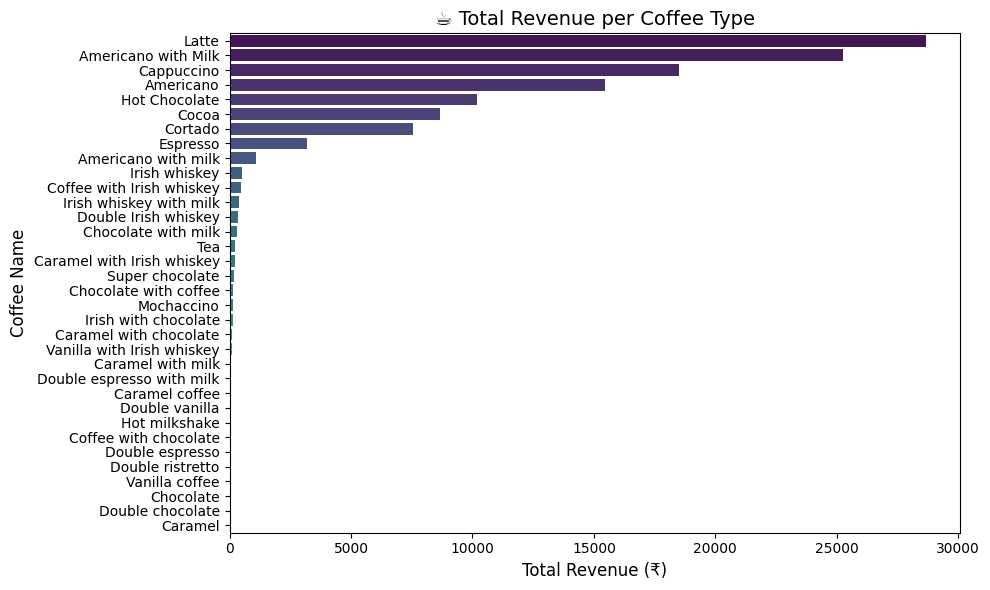

In [44]:
# Plot a bar chart of total revenue per coffee_name using Seaborn.

import seaborn as sns
import matplotlib.pyplot as plt

# Group by coffee_name and sum money
coffee_revenue = combined_df.groupby('coffee_name')['money'].sum().reset_index()

# Sort values (optional)
coffee_revenue = coffee_revenue.sort_values(by='money', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=coffee_revenue, y='coffee_name', x='money', palette='viridis')

plt.title('☕ Total Revenue per Coffee Type', fontsize=14)
plt.xlabel('Total Revenue (₹)', fontsize=12)
plt.ylabel('Coffee Name', fontsize=12)

plt.tight_layout()
plt.show()

<ipython-input-45-4b797e9e4dbc>:17: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


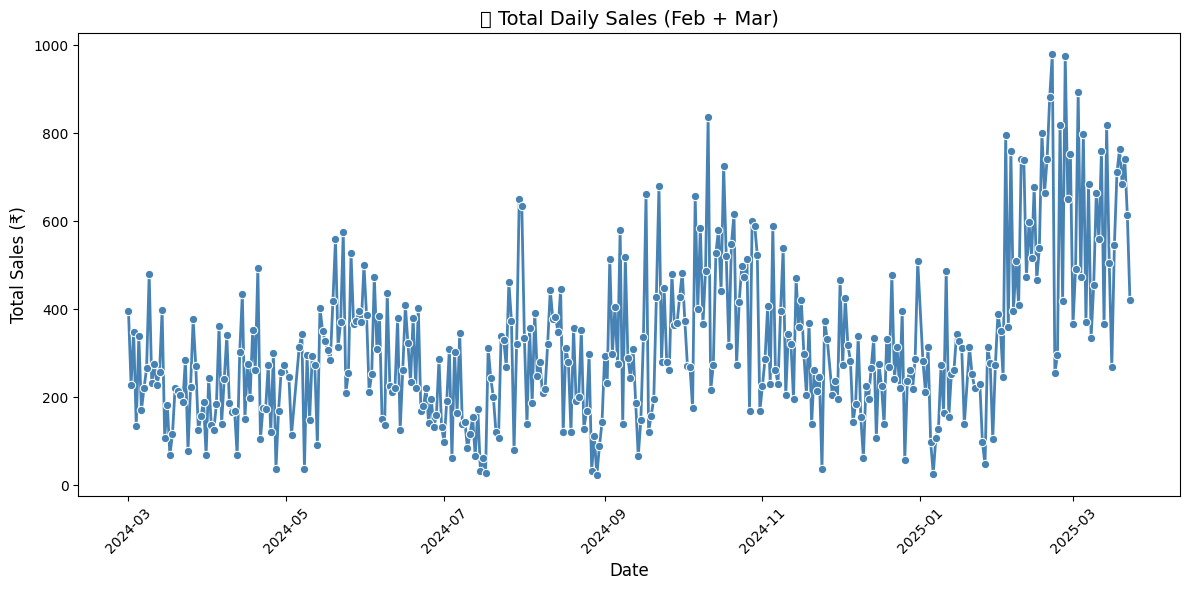

In [45]:
# Plot a line chart showing total daily sales from combined dataset.

# Reuse daily revenue from Task 13 (or recalculate)
daily_sales = combined_df.groupby('date')['money'].sum().reset_index()

# Ensure it's sorted by date
daily_sales = daily_sales.sort_values(by='date')

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='date', y='money', marker='o', linewidth=2, color='steelblue')

plt.title('📈 Total Daily Sales (Feb + Mar)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales (₹)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()